In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pycountry
import geopandas

In [3]:
df = pd.read_csv("../dat/drug_listings_cleaned.csv", index_col=0)
df

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_from_alpha_3
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,DEU
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,DEU
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,DEU
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,DEU
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,AUT
...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NLD
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NLD
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NLD
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,NaN


In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [7]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
listings_shipped_from_each_country = df["ship_from_alpha_3"].value_counts().to_frame()
listings_shipped_from_each_country

,ship_from_alpha_3
USA,12723
GBR,6794
DEU,5030
NLD,4813
AUS,3565
...,...
GMB,1
SLV,1
CHL,1
GGY,1


In [24]:
merge = pd.merge(world, listings_shipped_from_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_alpha_3
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


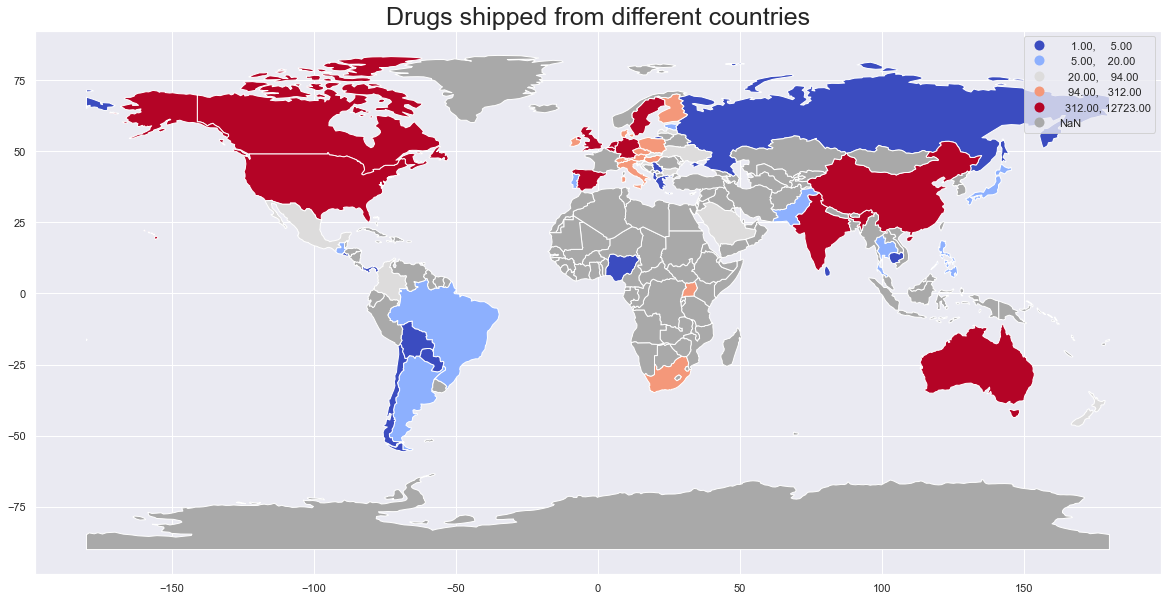

In [29]:
merge.plot(column='ship_from_alpha_3', 
           scheme="quantiles",
           figsize=(35, 10),
           legend=True,
           cmap='coolwarm',
           missing_kwds = dict(color = "darkgrey",))
plt.title('Drugs shipped from different countries', fontsize=25);

In [ ]:
merge.plot(column='ship_from_alpha_3', 
           scheme="quantiles",
           figsize=(35, 10),
           legend=True,
           cmap='coolwarm',
           missing_kwds = dict(color = "darkgrey",))
plt.title('Drugs shipped from different countries (normalized by)', fontsize=25);

In [4]:
df_mental_health = pd.read_csv("../dat/share-with-mental-and-substance-disorders.csv")
df_mental_health

,Entity,Code,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,16.659229
1,Afghanistan,AFG,1991,16.765052
2,Afghanistan,AFG,1992,16.874469
3,Afghanistan,AFG,1993,16.990720
4,Afghanistan,AFG,1994,17.112730
...,...,...,...,...
8155,Zimbabwe,ZWE,2015,11.156429
8156,Zimbabwe,ZWE,2016,11.164133
8157,Zimbabwe,ZWE,2017,11.170427
8158,Zimbabwe,ZWE,2018,11.158765
